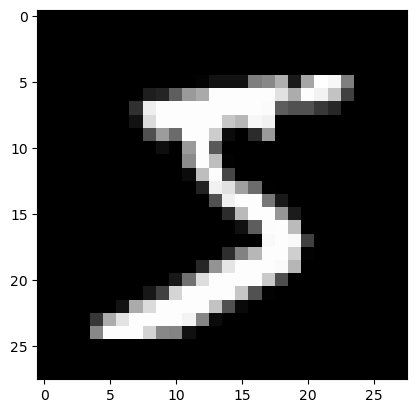

In [2]:
import tensorflow.keras as keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,Reshape, LeakyReLU as LR,Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()



In [3]:

LATENT_SIZE = 32

encoder = Sequential([Flatten(input_shape = (28, 28)),Dense(512),LR(),Dropout(0.5),Dense(256),LR(),Dropout(0.5),Dense(128),
    LR(),Dropout(0.5),Dense(64),LR(),Dropout(0.5),Dense(LATENT_SIZE),LR()])


C:\Users\adnan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:

decoder = Sequential([Dense(64, input_shape = (LATENT_SIZE,)),LR(),Dropout(0.5),Dense(128),LR(),Dropout(0.5),Dense(256),
    LR(),Dropout(0.5),Dense(512),LR(),Dropout(0.5),Dense(784),Activation("sigmoid"),Reshape((28, 28))])


C:\Users\adnan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


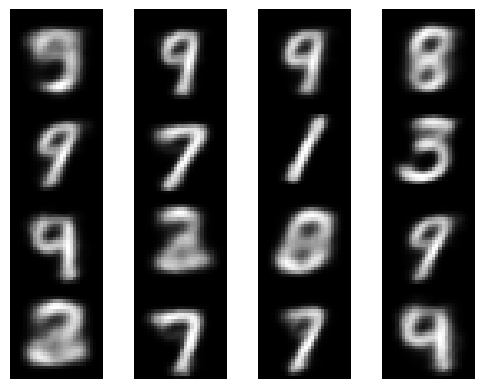

----------- EPOCH 4 -----------
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - loss: 0.1986


In [5]:
img = Input(shape = (28, 28))

latent_vector = encoder(img)
output = decoder(latent_vector)

model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

EPOCHS = 5

for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

    display.clear_output() # If you imported display from IPython

    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")

    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)

In [6]:
# Final evaluation of the model
test_reconstructions = model.predict(x_test)
test_loss = model.evaluate(x_test, x_test)
print("Final test loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.1741
Final test loss: 0.17477597296237946
